In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
dataset_original =  pd.read_csv("../datos/competencia_03.csv.gz")

In [218]:
dataset_original

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
0,69795509,201911,1,0,1,49,141,3038.110,28341.280,1419.930,...,3.000,0.000,-7882.560,0.000,3016.000,1726.580,7.000,0.000,13935.240,CONTINUA
1,69796585,201911,1,0,1,48,123,710.390,24637.580,-178.220,...,3.000,0.000,-3726.220,0.000,3709.000,1638.200,4.000,0.000,328.440,CONTINUA
2,69796602,201911,1,0,1,48,176,2177.320,22757.880,1088.200,...,3.000,0.000,-11974.880,0.000,2573.000,2421.480,7.000,0.000,1489.710,CONTINUA
3,69797166,201911,1,0,1,47,117,1449.660,23686.330,1508.950,...,3.000,0.000,-480.930,0.000,2092.000,1634.850,3.000,0.000,1219.920,CONTINUA
4,69798669,201911,1,0,0,46,78,30.880,412.470,0.000,...,10.000,0.000,-1032.240,0.000,2357.000,0.000,0.000,0.000,0.000,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893023,34295183,202006,0,0,0,51,268,0.000,0.000,0.000,...,-1.000,0.000,-12935.960,0.000,4331.000,3419.650,9.000,0.000,1935.450,CONTINUA
4893024,34342647,202006,0,0,0,45,200,0.000,0.000,0.000,...,6.000,0.000,NaN,NaN,5384.000,NaN,NaN,NaN,0.000,CONTINUA
4893025,34397685,202006,0,0,0,53,278,0.000,0.000,0.000,...,6.000,0.000,-20809.020,0.000,6789.000,9082.850,10.000,0.000,5114.280,CONTINUA
4893026,34414415,202006,0,0,0,72,366,0.000,0.000,0.000,...,20.000,269157.560,-297982.480,14.020,9031.000,235896.020,48.000,0.000,14850.180,CONTINUA


In [219]:
#ipc_arg =  pd.read_excel("../datos/ipc_arg.xlsx")

In [220]:
#inflacao acumulada = ipc_nivel_general_nacional - ipc_nivel_general_nacional.shift(1)
#ipc_arg['inflacion_acumulada'] =  ipc_arg['ipc_nivel_general_nacional'].shift(1) - ipc_arg['ipc_nivel_general_nacional']
#ipc_arg['indice_tiempo'] = ipc_arg['indice_tiempo'].dt.strftime('%Y%m').astype(int)
#ipc_arg.rename(columns={'indice_tiempo':'foto_mes'}, inplace=True)
#ipc_arg


In [221]:
#data_teste = dataset_original.head(5)

In [222]:
#data_teste

In [223]:
# Mesclando o dataframe original com o dataframe ipc_arg com base na coluna 'ano_mes'
#merged_df = pd.merge(dataset_original, ipc_arg[['inflacion_acumulada', 'foto_mes']], how='left', on='foto_mes')

# Calculando 'mcomisiones_atualizado' com base na inflação acumulada
#merged_df['mcomisiones_atualizado'] = merged_df['mcomisiones'] * (1 + merged_df['inflacion_acumulada'])

# Dropando a coluna 'ano_mes' se você não precisar dela mais
#merged_df = merged_df.drop('foto_mes', axis=1)
#merged_df

In [224]:
#dataset = dataset_original.copy()
dataset_baseline = dataset_original[((dataset_original['foto_mes'] >= 201903) & (dataset_original['foto_mes'] <= 201910)) | (dataset_original['foto_mes'] == 202107)]
dataset = dataset_baseline.copy()

In [225]:
dataset['foto_mes'].unique()

array([201906, 201907, 201909, 201910, 201903, 201905, 201908, 201904,
       202107], dtype=int64)

In [226]:
dataset.set_index('foto_mes', inplace=True)

In [227]:
df_roto_zero_null = ((dataset.isnull() | (dataset == 0)).groupby('foto_mes').mean() * 100).round(2)
df_roto_zero_null = df_roto_zero_null[df_roto_zero_null.columns[df_roto_zero_null.eq(100).any()]].stack().reset_index()
df_roto_zero_null.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_zero_null = df_roto_zero_null[df_roto_zero_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [228]:
df_roto_zero_bruto = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_roto_zero = df_roto_zero_bruto[df_roto_zero_bruto.columns[df_roto_zero_bruto.eq(100).any()]].stack().reset_index()
df_roto_zero.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_zero = df_roto_zero[df_roto_zero['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

In [229]:
df_roto_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)
df_roto_null = df_roto_null[df_roto_null.columns[df_roto_null.eq(100).any()]].stack().reset_index()
df_roto_null.columns = ['foto_mes', 'coluna', 'porcentagem']
df_roto_null = df_roto_null[df_roto_null['porcentagem'] == 100].sort_values(by='foto_mes', ascending=True)

C:\Users\maico\AppData\Local\Temp\ipykernel_4412\2256541971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero_null, palette='viridis')


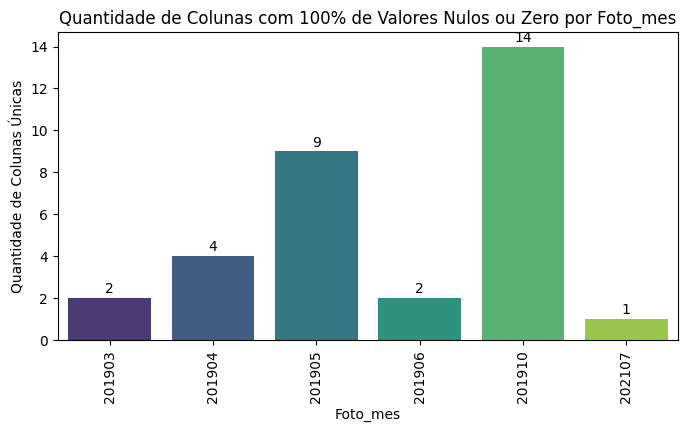

In [230]:
count_df_roto_zero_null = df_roto_zero_null.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero_null, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores Nulos ou Zero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_zero_null['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

C:\Users\maico\AppData\Local\Temp\ipykernel_4412\3315999687.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero, palette='viridis')


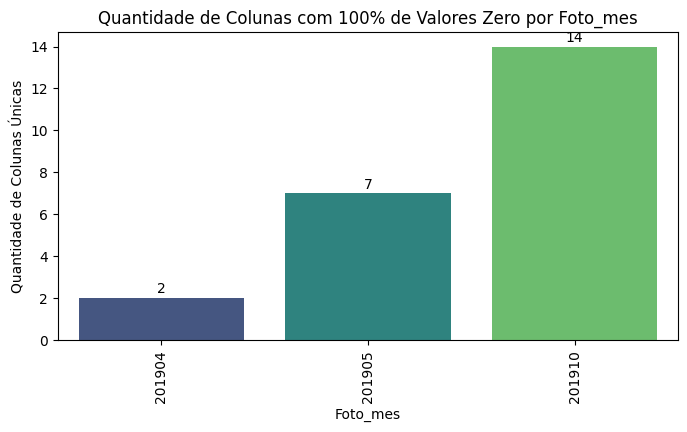

In [231]:
count_df_roto_zero = df_roto_zero.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_zero, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores Zero por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_zero['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [232]:
df_roto_zero

,foto_mes,coluna,porcentagem
21,201904,ctarjeta_visa_debitos_automaticos,100.000
22,201904,mttarjeta_visa_debitos_automaticos,100.000
32,201905,mrentabilidad,100.000
33,201905,mrentabilidad_annual,100.000
34,201905,mcomisiones,100.000
35,201905,mactivos_margen,100.000
36,201905,mpasivos_margen,100.000
45,201905,ccomisiones_otras,100.000
46,201905,mcomisiones_otras,100.000
125,201910,ccomisiones_otras,100.000


C:\Users\maico\AppData\Local\Temp\ipykernel_4412\1015547022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_null, palette='viridis')


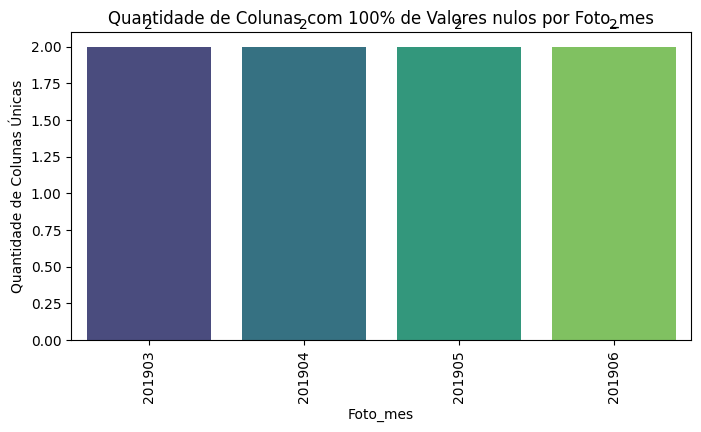

In [233]:
count_df_roto_null = df_roto_null.groupby('foto_mes')['coluna'].nunique().reset_index(name='quantidade_colunas')
plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=count_df_roto_null, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores nulos por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(count_df_roto_null['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [234]:
#Exclui os valores de cmobile_app_trx e tmobile_app para os anos de 201901 ate 201906 porque todos os valores estao null, talvez nao tinha essa funcionalidade na epoca no sistema

merged_df = pd.merge(count_df_roto_zero_null, count_df_roto_null, on='foto_mes', how='outer', suffixes=('_zero', '_null'))
merged_df = merged_df.fillna(0)
merged_df['quantidade_colunas'] =  merged_df['quantidade_colunas_zero'] - merged_df['quantidade_colunas_null']


C:\Users\maico\AppData\Local\Temp\ipykernel_4412\2532655015.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='foto_mes', y='quantidade_colunas', data=merged_df, palette='viridis')


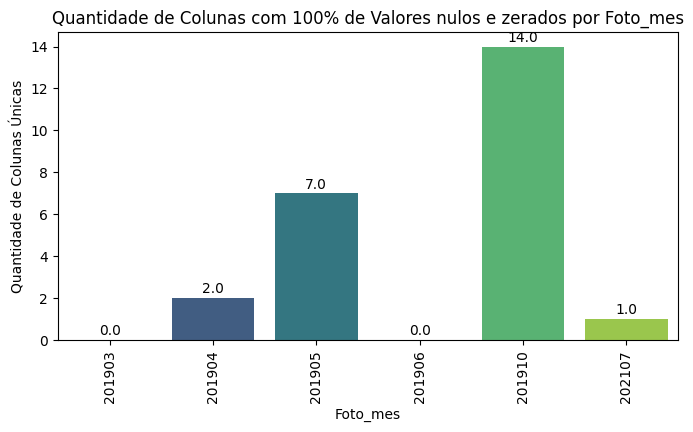

In [235]:

plt.figure(figsize=(8, 4))
sns.barplot(x='foto_mes', y='quantidade_colunas', data=merged_df, palette='viridis')
plt.title('Quantidade de Colunas com 100% de Valores nulos e zerados por Foto_mes')
plt.xlabel('Foto_mes')
plt.ylabel('Quantidade de Colunas Únicas')
plt.xticks(rotation='vertical')
for index, value in enumerate(merged_df['quantidade_colunas']):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')
plt.show()

In [236]:
df_parcial_zero = ((dataset == 0).groupby('foto_mes').mean() * 100).round(2)
df_parcial_null = ((dataset.isnull()).groupby('foto_mes').mean() * 100).round(2)

In [237]:
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)
filtered_columns

numero_de_cliente          False
active_quarter             False
cliente_vip                False
internet                   False
cliente_edad               False
                           ...  
Visa_mconsumototal         False
Visa_cconsumos             False
Visa_cadelantosefectivo    False
Visa_mpagominimo           False
clase_ternaria             False
Length: 154, dtype: bool

In [238]:
df_parcial_zero_filtered = df_parcial_zero.loc[:, filtered_columns]
df_parcial_null_filtered = df_parcial_null.loc[:, filtered_columns]

In [239]:
df_parcial_zero_filtered

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccomisiones_otras,mcomisiones_otras,chomebanking_transacciones,tmobile_app,cmobile_app_trx,Master_madelantodolares
foto_mes,,,,,,,,,,,,,,,,,,,
201903,0.250,0.220,2.540,3.860,1.260,33.240,33.240,95.390,96.010,92.700,93.040,97.800,97.930,2.540,2.540,35.830,0.000,0.000,42.620
201904,0.250,0.220,2.530,4.060,1.220,100.000,100.000,95.620,96.310,91.010,91.430,97.280,97.460,2.530,2.530,40.940,0.000,0.000,42.470
201905,100.000,100.000,100.000,100.000,100.000,33.250,33.250,95.550,96.230,89.420,89.810,96.400,96.570,100.000,100.000,47.700,0.000,0.000,42.100
201906,0.240,0.210,2.750,3.810,1.130,33.320,33.320,94.940,95.920,88.940,89.580,96.550,96.820,2.750,2.750,48.270,0.000,0.000,41.310
201907,0.260,0.230,2.580,4.390,1.070,32.980,32.980,94.840,96.080,89.790,90.690,96.590,96.960,2.580,2.580,43.820,46.880,47.230,41.440
201908,0.290,0.250,2.770,4.480,1.340,33.340,33.340,95.880,96.580,92.550,92.950,97.950,98.140,2.770,2.770,44.310,45.920,46.120,40.830
201909,0.310,0.270,3.380,4.220,1.060,33.560,33.560,96.050,96.590,93.390,93.650,98.120,98.240,3.380,3.380,44.890,45.490,45.820,40.010
201910,100.000,100.000,100.000,100.000,100.000,33.560,33.560,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,44.190,44.500,40.280
202107,0.160,0.140,2.860,4.230,1.150,34.810,34.810,96.520,96.540,93.930,94.330,94.520,94.960,2.860,2.860,15.330,97.630,21.560,42.470


In [240]:
df_parcial_null_filtered

,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccomisiones_otras,mcomisiones_otras,chomebanking_transacciones,tmobile_app,cmobile_app_trx,Master_madelantodolares
foto_mes,,,,,,,,,,,,,,,,,,,
201903,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.510,0.000,0.250,0.000,0.000,0.000,100.000,100.000,57.360
201904,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.840,0.000,0.320,0.000,0.000,0.000,100.000,100.000,57.510
201905,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.830,0.000,0.300,0.000,0.000,0.000,100.000,100.000,57.890
201906,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.510,0.000,0.410,0.000,0.000,0.000,100.000,100.000,58.670
201907,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.680,0.000,0.590,0.000,0.000,0.000,0.000,0.000,58.550
201908,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.540,0.000,0.450,0.000,0.000,0.000,0.000,0.000,59.150
201909,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.790,0.000,0.300,0.000,0.000,0.000,0.000,0.000,59.980
201910,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,59.700
202107,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.650,0.000,2.700,0.000,0.000,0.000,0.000,0.000,57.530


In [241]:
bool_index = df_parcial_zero_filtered.index.isin(df_parcial_null_filtered.index)


In [242]:
bool_index

array([ True,  True,  True,  True,  True,  True,  True,  True,  True])

In [243]:
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)


In [244]:
filtered_columns_true = filtered_columns[filtered_columns == True].index

In [245]:
filtered_columns_true

Index(['mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       'mactivos_margen', 'mpasivos_margen',
       'ctarjeta_visa_debitos_automaticos',
       'mttarjeta_visa_debitos_automaticos', 'ccajeros_propios_descuentos',
       'mcajeros_propios_descuentos', 'ctarjeta_visa_descuentos',
       'mtarjeta_visa_descuentos', 'ctarjeta_master_descuentos',
       'mtarjeta_master_descuentos', 'ccomisiones_otras', 'mcomisiones_otras',
       'chomebanking_transacciones', 'tmobile_app', 'cmobile_app_trx',
       'Master_madelantodolares'],
      dtype='object')

In [246]:
df_parcial_zero[filtered_columns_true].stack().reset_index(name='quantidade_zero')

,foto_mes,level_1,quantidade_zero
0,201903,mrentabilidad,0.250
1,201903,mrentabilidad_annual,0.220
2,201903,mcomisiones,2.540
3,201903,mactivos_margen,3.860
4,201903,mpasivos_margen,1.260
...,...,...,...
166,202107,mcomisiones_otras,2.860
167,202107,chomebanking_transacciones,15.330
168,202107,tmobile_app,97.630
169,202107,cmobile_app_trx,21.560


In [247]:
df_parcial_null[filtered_columns_true].stack().reset_index(name='quantidade_null')

,foto_mes,level_1,quantidade_null
0,201903,mrentabilidad,0.000
1,201903,mrentabilidad_annual,0.000
2,201903,mcomisiones,0.000
3,201903,mactivos_margen,0.000
4,201903,mpasivos_margen,0.000
...,...,...,...
166,202107,mcomisiones_otras,0.000
167,202107,chomebanking_transacciones,0.000
168,202107,tmobile_app,0.000
169,202107,cmobile_app_trx,0.000


In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que você tenha df_parcial_zero e df_parcial_null disponíveis

# Filtrar colunas onde a soma das porcentagens de valores zero e nulos é igual a 100
filtered_columns = (df_parcial_zero + df_parcial_null).eq(100).any(axis=0)

# Selecionar apenas as colunas relevantes
df_parcial_zero_filtered = df_parcial_zero[filtered_columns_true].stack().reset_index(name='quantidade_zero')
df_parcial_null_filtered = df_parcial_null[filtered_columns_true].stack().reset_index(name='quantidade_null')

# Mesclar os dois dataframes
df_merged = pd.merge(df_parcial_zero_filtered, df_parcial_null_filtered, on=['foto_mes', 'level_1'])
df_merged = df_merged[(df_merged['quantidade_zero'] + df_merged['quantidade_null']) == 100]


In [249]:
df_merged

,foto_mes,level_1,quantidade_zero,quantidade_null
16,201903,tmobile_app,0.000,100.000
17,201903,cmobile_app_trx,0.000,100.000
24,201904,ctarjeta_visa_debitos_automaticos,100.000,0.000
25,201904,mttarjeta_visa_debitos_automaticos,100.000,0.000
35,201904,tmobile_app,0.000,100.000
36,201904,cmobile_app_trx,0.000,100.000
38,201905,mrentabilidad,100.000,0.000
39,201905,mrentabilidad_annual,100.000,0.000
40,201905,mcomisiones,100.000,0.000
41,201905,mactivos_margen,100.000,0.000


In [250]:
colunas_imputar = df_roto_zero['coluna'].unique()

In [251]:
colunas_imputar

array(['ctarjeta_visa_debitos_automaticos',
       'mttarjeta_visa_debitos_automaticos', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen',
       'mpasivos_margen', 'ccomisiones_otras', 'mcomisiones_otras',
       'mtarjeta_master_descuentos', 'ctarjeta_master_descuentos',
       'mtarjeta_visa_descuentos', 'ctarjeta_visa_descuentos',
       'mcajeros_propios_descuentos', 'ccajeros_propios_descuentos',
       'chomebanking_transacciones'], dtype=object)

In [252]:
#passar colunas com zero para na
dataset[colunas_imputar] = dataset[colunas_imputar].replace(0, np.nan)

In [253]:
dataset[colunas_imputar].isna().sum()   

ctarjeta_visa_debitos_automaticos      490081
mttarjeta_visa_debitos_automaticos     490081
mrentabilidad                          266552
mrentabilidad_annual                   266254
mcomisiones                            290468
mactivos_margen                        303461
mpasivos_margen                        275296
ccomisiones_otras                      290449
mcomisiones_otras                      290469
mtarjeta_master_descuentos            1185521
ctarjeta_master_descuentos            1175076
mtarjeta_visa_descuentos              1148310
ctarjeta_visa_descuentos              1118545
mcajeros_propios_descuentos           1169330
ccajeros_propios_descuentos           1162260
chomebanking_transacciones             558607
dtype: int64

In [254]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [255]:
dataset_original[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4893028.000,4818336.000,4893028.000,4810103.000,4893028.000,4893028.000,4893028.000,4893028.000
mean,2.373,5461.627,2278.755,25661.771,1141.793,-617.412,1586.546,8.248,1148.173,13.750,0.054,43.414,0.092,16.734,0.064,40.732
std,3.200,11103.566,7067.582,60974.377,2799.223,3351.625,4560.329,7.421,2822.936,274.097,0.464,455.214,0.483,167.108,0.473,72.968
min,0.000,0.000,-1948808.830,-1862286.080,-1953482.100,-555339.210,-125969.940,0.000,-1953482.100,0.000,0.000,0.000,0.000,-246.330,0.000,0.000
25%,0.000,0.000,0.000,2872.870,148.850,-1126.320,150.900,4.000,149.350,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,1149.540,1149.410,14039.100,613.100,-214.760,614.850,8.000,615.170,0.000,0.000,0.000,0.000,0.000,0.000,11.000
75%,3.000,6269.270,2782.950,30420.625,1512.120,0.000,1563.990,11.000,1516.650,0.000,0.000,0.000,0.000,0.000,0.000,55.000
max,75.000,769131.930,2599540.050,11161405.720,1959169.310,568198.100,1799988.850,292.000,1959169.310,124292.830,58.000,118224.210,57.000,53538.070,44.000,10387.000


In [256]:
dataset[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,719008.000,719008.000,942537.000,942835.000,918621.000,905628.000,933793.000,918640.000,918620.000,23568.000,34013.000,60779.000,90544.000,39759.000,46829.000,650482.000
mean,3.809,7440.161,3168.824,31307.869,1163.058,-538.629,2273.642,9.640,1170.109,828.316,1.485,942.979,1.576,493.769,2.023,25.389
std,3.328,11167.431,7722.572,60249.580,3332.894,2791.988,5297.022,7.200,3358.322,1781.027,1.108,1726.461,1.241,733.539,2.058,53.739
min,1.000,0.010,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,1.000,-1953482.100,0.170,1.000,0.110,1.000,-51.840,1.000,1.000
25%,1.000,1342.360,733.130,9461.440,245.540,-964.015,397.910,6.000,245.930,139.213,1.000,164.320,1.000,94.770,1.000,3.000
50%,3.000,3853.965,1714.640,18233.140,724.860,-270.620,1014.790,8.000,727.020,408.960,1.000,441.510,1.000,235.360,1.000,7.000
75%,5.000,8948.260,3474.630,34108.860,1430.190,40.953,2287.710,12.000,1433.723,869.213,2.000,1127.295,2.000,644.815,2.000,21.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [257]:
#dataset sem periodo zerado 
dataset_original[colunas_imputar][(dataset_original['foto_mes'] >= 201904) & (dataset_original['foto_mes'] <= 201909)].describe()


,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,781356.000,778263.000,781356.000,762866.000,781356.000,781356.000,781356.000,781356.000
mean,2.097,3720.931,2702.307,27916.606,858.277,-347.487,1919.495,8.006,863.862,17.182,0.042,57.386,0.147,16.851,0.094,5.502
std,3.066,7879.545,6650.039,56048.119,2111.626,1913.541,4896.150,7.430,2136.302,284.688,0.307,452.636,0.603,146.915,0.635,18.951
min,0.000,0.000,-202220.120,-1858705.730,-54072.560,-181435.160,-28681.220,0.000,-53983.240,0.000,0.000,0.000,0.000,-51.840,0.000,0.000
25%,0.000,0.000,112.440,5320.130,42.120,-670.260,99.010,4.000,42.150,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,1.000,375.360,1291.600,15565.875,418.710,-77.020,735.810,8.000,419.610,0.000,0.000,0.000,0.000,0.000,0.000,1.000
75%,3.000,4211.970,2893.020,30490.130,1166.880,0.000,1934.983,12.000,1169.875,0.000,0.000,0.000,0.000,0.000,0.000,5.000
max,55.000,577457.570,894482.140,6246624.680,322021.440,400016.110,667148.640,182.000,322021.440,124292.830,19.000,85508.390,27.000,9763.040,41.000,3290.000


* ctarjeta_visa_debitos_automaticos	--	Cantidad de débitos automáticos debitados durante el mes en las tarjeta de crédito VISA
* mtarjeta_visa_debitos_automaticos	pesos	Monto total de  débitos automáticos debitados durante el mes en la tarjeta de crédito VISA . Todo está convertido a pesos argentinos, al valor de la fecha de cierre del utlimo dia habil del mes.
* mrentabilidad	pesos	Ganancia total que ha obtenido el banco de ese cliente, en ese mes.
* mrentabilidad_annual	pesos	Ganancia total que el banco ha obtenido de ese cliente en el ultimo año de relacion cliente-banco,  o meses desde que ingresó si es cliente reciente.
* mcomisiones	pesos	Monto total de las comisiones que ha ganado el banco por ese cliente.
* mactivos_margen	pesos	Monto total de la ganancia que el banco ha obtenido en concepto de intereses que ha cobrado al cliente.
* mpasivos_margen	pesos	Monto total de la ganancia que el banco ha obtenido por el dinero/inversiones que el cliente tiene en el banco.
* ccomisiones_otras	--	Cantidad de otras comisiones que se cobraron al cliente durante el mes.
* mcomisiones_otras	pesos	Monto total en pesos de otras comisiones que se cobraron al cliente durante el mes.


In [258]:
dataset_inputar = dataset_baseline.copy()

In [259]:
dataset_inputar[colunas_imputar].isna().sum()

ctarjeta_visa_debitos_automaticos         0
mttarjeta_visa_debitos_automaticos        0
mrentabilidad                             0
mrentabilidad_annual                      0
mcomisiones                               0
mactivos_margen                           0
mpasivos_margen                           0
ccomisiones_otras                         0
mcomisiones_otras                         0
mtarjeta_master_descuentos             7864
ctarjeta_master_descuentos                0
mtarjeta_visa_descuentos              24753
ctarjeta_visa_descuentos                  0
mcajeros_propios_descuentos               0
ccajeros_propios_descuentos               0
chomebanking_transacciones                0
dtype: int64

In [260]:
dataset_inputar[colunas_imputar] = dataset_inputar[colunas_imputar].replace(0, np.nan)

In [261]:
np.append(['foto_mes', 'numero_de_cliente'], colunas_imputar)

array(['foto_mes', 'numero_de_cliente',
       'ctarjeta_visa_debitos_automaticos',
       'mttarjeta_visa_debitos_automaticos', 'mrentabilidad',
       'mrentabilidad_annual', 'mcomisiones', 'mactivos_margen',
       'mpasivos_margen', 'ccomisiones_otras', 'mcomisiones_otras',
       'mtarjeta_master_descuentos', 'ctarjeta_master_descuentos',
       'mtarjeta_visa_descuentos', 'ctarjeta_visa_descuentos',
       'mcajeros_propios_descuentos', 'ccajeros_propios_descuentos',
       'chomebanking_transacciones'], dtype=object)

In [262]:
dataset_inputar

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
244824,112470962,201906,1,0,1,37,92,182.960,21076.660,153.550,...,4.000,0.000,0.000,0.000,2078.000,393.810,2.000,0.000,340.170,CONTINUA
244825,112471475,201906,1,0,1,28,92,138.050,6498.850,226.520,...,12.000,23460.000,-4117.230,0.000,2611.000,11377.630,7.000,0.000,6146.520,CONTINUA
244826,112473055,201906,1,0,1,39,92,13212.770,131708.120,240.450,...,4.000,0.000,NaN,NaN,1985.000,NaN,NaN,NaN,0.000,CONTINUA
244827,112474259,201906,1,0,1,48,92,2503.170,31616.530,1118.290,...,4.000,0.000,-28198.920,0.000,2660.000,22105.180,10.000,0.000,30955.470,CONTINUA
244828,112474489,201906,0,0,0,53,92,835.250,946.840,830.900,...,4.000,0.000,NaN,NaN,2462.000,NaN,NaN,NaN,0.000,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870741,127675174,201904,1,0,1,49,53,6977.490,67127.360,3787.680,...,-1.000,0.000,-30970.840,17.360,1595.000,14725.220,43.000,0.000,0.000,CONTINUA
4870742,126355597,201904,1,0,1,65,41,1534.090,13787.260,1048.590,...,-1.000,0.000,-809.330,0.000,826.000,0.000,0.000,0.000,387.090,CONTINUA
4870743,126368424,201904,1,0,1,40,55,4110.400,26091.210,420.250,...,-1.000,0.000,-54378.020,8.150,1659.000,46564.730,15.000,0.000,13993.890,CONTINUA
4870744,126740458,201904,1,0,1,33,56,631.700,7453.920,193.290,...,6.000,0.000,-9424.360,0.000,1511.000,595.300,2.000,0.000,93.840,CONTINUA


In [263]:
#dataset_inputar = dataset_inputar[np.append(['foto_mes', 'numero_de_cliente'], colunas_imputar)]

In [264]:
dataset_inputar

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
244824,112470962,201906,1,0,1,37,92,182.960,21076.660,153.550,...,4.000,0.000,0.000,0.000,2078.000,393.810,2.000,0.000,340.170,CONTINUA
244825,112471475,201906,1,0,1,28,92,138.050,6498.850,226.520,...,12.000,23460.000,-4117.230,0.000,2611.000,11377.630,7.000,0.000,6146.520,CONTINUA
244826,112473055,201906,1,0,1,39,92,13212.770,131708.120,240.450,...,4.000,0.000,NaN,NaN,1985.000,NaN,NaN,NaN,0.000,CONTINUA
244827,112474259,201906,1,0,1,48,92,2503.170,31616.530,1118.290,...,4.000,0.000,-28198.920,0.000,2660.000,22105.180,10.000,0.000,30955.470,CONTINUA
244828,112474489,201906,0,0,0,53,92,835.250,946.840,830.900,...,4.000,0.000,NaN,NaN,2462.000,NaN,NaN,NaN,0.000,CONTINUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4870741,127675174,201904,1,0,1,49,53,6977.490,67127.360,3787.680,...,-1.000,0.000,-30970.840,17.360,1595.000,14725.220,43.000,0.000,0.000,CONTINUA
4870742,126355597,201904,1,0,1,65,41,1534.090,13787.260,1048.590,...,-1.000,0.000,-809.330,0.000,826.000,0.000,0.000,0.000,387.090,CONTINUA
4870743,126368424,201904,1,0,1,40,55,4110.400,26091.210,420.250,...,-1.000,0.000,-54378.020,8.150,1659.000,46564.730,15.000,0.000,13993.890,CONTINUA
4870744,126740458,201904,1,0,1,33,56,631.700,7453.920,193.290,...,6.000,0.000,-9424.360,0.000,1511.000,595.300,2.000,0.000,93.840,CONTINUA


<Axes: >

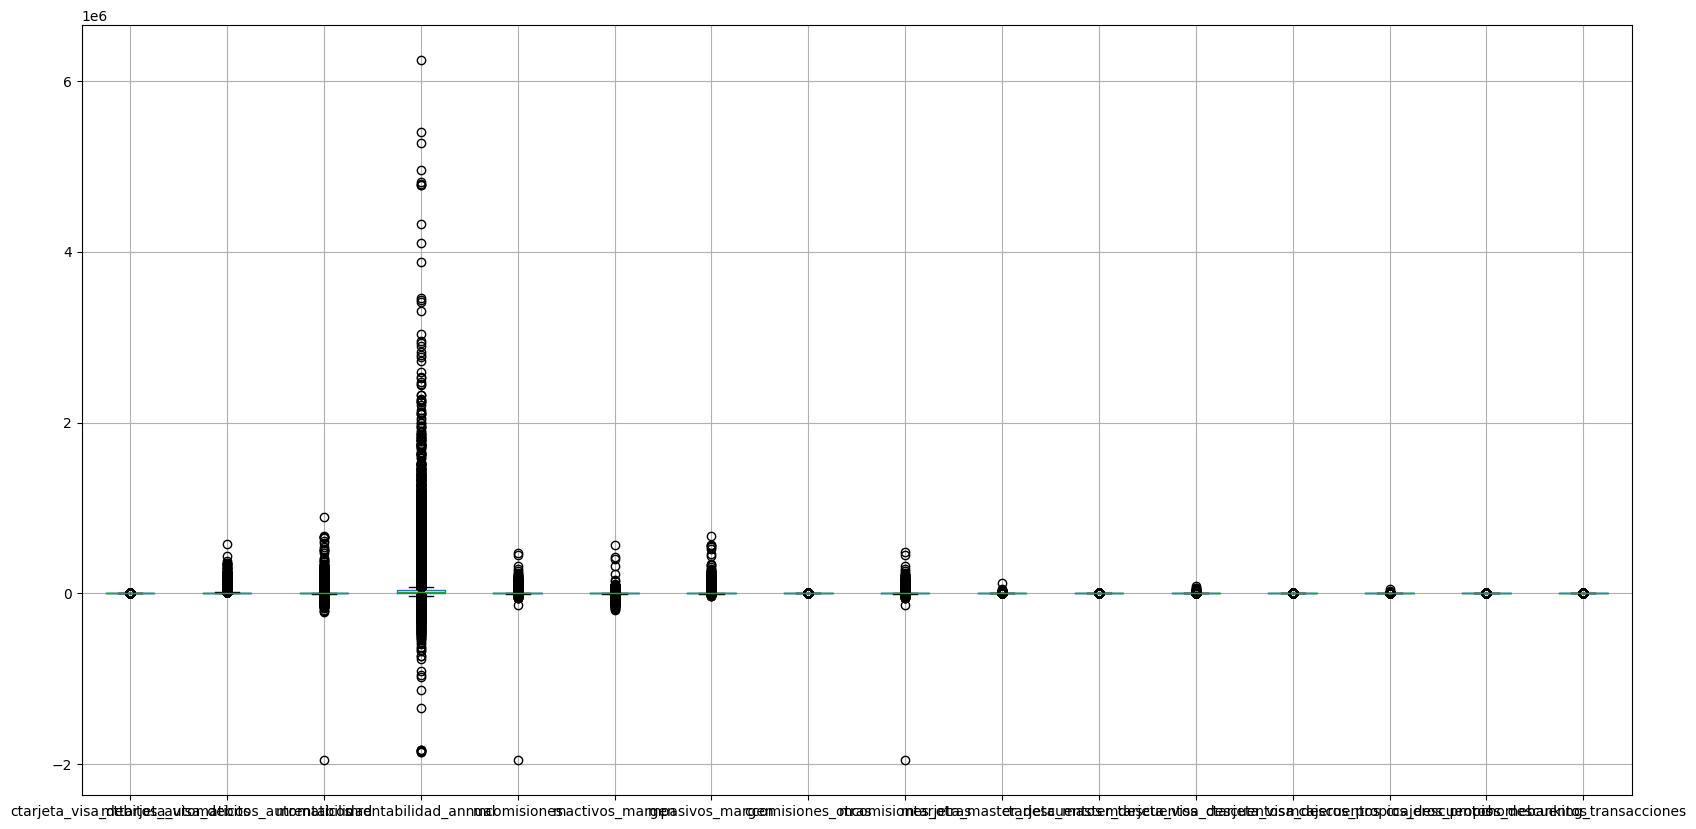

In [265]:
#verificar se possui outliers
dataset_inputar[colunas_imputar].boxplot(figsize=(20,10))

In [266]:
#preencher valores nulos com a media
dataset_inputado_media = dataset_inputar.copy()
dataset_inputado_mediana = dataset_inputar.copy()

dataset_inputado_media[colunas_imputar] = dataset_inputar[colunas_imputar].fillna(dataset_inputar[colunas_imputar].mean())
dataset_inputado_mediana[colunas_imputar] = dataset_inputar[colunas_imputar].fillna(dataset_inputar[colunas_imputar].median())

In [267]:
dataset_inputar[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,719008.000,719008.000,942537.000,942835.000,918621.000,905628.000,933793.000,918640.000,918620.000,23568.000,34013.000,60779.000,90544.000,39759.000,46829.000,650482.000
mean,3.809,7440.161,3168.824,31307.869,1163.058,-538.629,2273.642,9.640,1170.109,828.316,1.485,942.979,1.576,493.769,2.023,25.389
std,3.328,11167.431,7722.572,60249.580,3332.894,2791.988,5297.022,7.200,3358.322,1781.027,1.108,1726.461,1.241,733.539,2.058,53.739
min,1.000,0.010,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,1.000,-1953482.100,0.170,1.000,0.110,1.000,-51.840,1.000,1.000
25%,1.000,1342.360,733.130,9461.440,245.540,-964.015,397.910,6.000,245.930,139.213,1.000,164.320,1.000,94.770,1.000,3.000
50%,3.000,3853.965,1714.640,18233.140,724.860,-270.620,1014.790,8.000,727.020,408.960,1.000,441.510,1.000,235.360,1.000,7.000
75%,5.000,8948.260,3474.630,34108.860,1430.190,40.953,2287.710,12.000,1433.723,869.213,2.000,1127.295,2.000,644.815,2.000,21.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [268]:
dataset_inputado_media[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000
mean,3.809,7440.161,3168.824,31307.869,1163.058,-538.629,2273.642,9.640,1170.109,828.316,1.485,942.979,1.576,493.769,2.023,25.389
std,2.566,8611.739,6818.392,53203.804,2905.096,2416.347,4655.088,6.276,2927.259,248.653,0.186,387.080,0.339,133.017,0.405,39.416
min,1.000,0.010,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,1.000,-1953482.100,0.170,1.000,0.110,1.000,-51.840,1.000,1.000
25%,2.000,2960.060,1004.430,11792.000,357.340,-658.110,555.580,6.000,357.980,828.316,1.485,942.979,1.576,493.769,2.023,6.000
50%,3.809,7440.161,2491.510,25250.710,1131.060,-538.629,1600.590,9.640,1133.880,828.316,1.485,942.979,1.576,493.769,2.023,25.389
75%,3.809,7440.161,3168.824,31307.869,1171.830,-29.090,2273.642,10.000,1172.830,828.316,1.485,942.979,1.576,493.769,2.023,25.389
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [269]:
dataset_inputado_mediana[colunas_imputar].describe()

,ctarjeta_visa_debitos_automaticos,mttarjeta_visa_debitos_automaticos,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,ccomisiones_otras,mcomisiones_otras,mtarjeta_master_descuentos,ctarjeta_master_descuentos,mtarjeta_visa_descuentos,ctarjeta_visa_descuentos,mcajeros_propios_descuentos,ccajeros_propios_descuentos,chomebanking_transacciones
count,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000,1209089.000
mean,3.481,5986.565,2848.239,28428.677,1057.786,-471.364,1987.016,9.246,1063.662,417.134,1.014,466.718,1.043,243.857,1.040,16.893
std,2.597,8789.880,6844.990,53478.965,2911.122,2419.140,4684.924,6.315,2933.373,255.322,0.202,402.289,0.372,140.773,0.451,40.468
min,1.000,0.010,-1948808.830,-1862286.080,-1953482.100,-189705.070,-28681.220,1.000,-1953482.100,0.170,1.000,0.110,1.000,-51.840,1.000,1.000
25%,2.000,2960.060,1004.430,11792.000,357.340,-658.110,555.580,6.000,357.980,408.960,1.000,441.510,1.000,235.360,1.000,6.000
50%,3.000,3853.965,1714.640,18233.140,724.860,-270.620,1014.790,8.000,727.020,408.960,1.000,441.510,1.000,235.360,1.000,7.000
75%,3.000,4981.300,2775.180,27837.740,1171.830,-29.090,1759.860,10.000,1172.830,408.960,1.000,441.510,1.000,235.360,1.000,8.000
max,57.000,577457.570,894482.140,6246624.680,471058.130,562428.340,667148.640,263.000,479099.150,124292.830,21.000,85508.390,27.000,53538.070,41.000,4257.000


In [270]:
dataset_inputado_mediana[colunas_imputar].mean()

ctarjeta_visa_debitos_automaticos        3.481
mttarjeta_visa_debitos_automaticos    5986.565
mrentabilidad                         2848.239
mrentabilidad_annual                 28428.677
mcomisiones                           1057.786
mactivos_margen                       -471.364
mpasivos_margen                       1987.016
ccomisiones_otras                        9.246
mcomisiones_otras                     1063.662
mtarjeta_master_descuentos             417.134
ctarjeta_master_descuentos               1.014
mtarjeta_visa_descuentos               466.718
ctarjeta_visa_descuentos                 1.043
mcajeros_propios_descuentos            243.857
ccajeros_propios_descuentos              1.040
chomebanking_transacciones              16.893
dtype: float64

In [271]:
dataset_inputado_mediana[colunas_imputar].median()

ctarjeta_visa_debitos_automaticos        3.000
mttarjeta_visa_debitos_automaticos    3853.965
mrentabilidad                         1714.640
mrentabilidad_annual                 18233.140
mcomisiones                            724.860
mactivos_margen                       -270.620
mpasivos_margen                       1014.790
ccomisiones_otras                        8.000
mcomisiones_otras                      727.020
mtarjeta_master_descuentos             408.960
ctarjeta_master_descuentos               1.000
mtarjeta_visa_descuentos               441.510
ctarjeta_visa_descuentos                 1.000
mcajeros_propios_descuentos            235.360
ccajeros_propios_descuentos              1.000
chomebanking_transacciones               7.000
dtype: float64

In [272]:
#adicionar dados de 

In [274]:
#gravar datasets em csv
dataset_inputar.to_csv('../datos/dataset_sem_inputar.csv.gz', index=False)

In [ ]:
dataset_inputado_media.to_csv('../datos/dataset_inputado_media.csv.gz', index=False)

In [ ]:
dataset_inputado_mediana.to_csv('../datos/dataset_inputado_mediana.csv.gz', index=False)